# AIR QUALITY PREDICTION USING REGRESSION




IMPORT LIBRARY

In [ ]:
# Step 1: Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

PREPROCESSING DAN PENGOLAHAN AWAL DATA

In [ ]:
# Step 2: Upload file AirQualityUCI.xlsx
uploaded = files.upload()

# Step 3: Load dataset dari file Excel
df = pd.read_excel("AirQualityUCI.xlsx")

# Step 4: Drop dua kolom terakhir yang kosong
df = df.iloc[:, :-2]

# Step 5: Ganti nilai -200 menjadi NaN (karena itu nilai error/missing)
df.replace(-200, np.nan, inplace=True)

# Step 6: Hapus baris yang mengandung nilai NaN
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Step 7: Ubah kolom Date menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Step 8: Gabungkan kolom Date dan Time menjadi kolom DateTime
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str), errors='coerce')

# Step 9: Atur DateTime sebagai indeks dan hapus kolom Date dan Time
df.set_index('DateTime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

# Step 10: Tampilkan semua isi data
pd.set_option('display.max_rows', None)     # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom

# Step 11: Tampilkan seluruh isi data
df

Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T
DateTime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.000000,150.0,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000
2004-03-10 19:00:00,2.0,1292.250000,112.0,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000
2004-03-10 20:00:00,2.2,1402.000000,88.0,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000
2004-03-10 21:00:00,2.2,1375.500000,80.0,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000
2004-03-10 22:00:00,1.6,1272.250000,51.0,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000
2004-03-10 23:00:00,1.2,1197.000000,38.0,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000
2004-03-11 00:00:00,1.2,1185.000000,31.0,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000
2004-03-11 01:00:00,1.0,1136.250000,31.0,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000
2004-03-11 02:00:00,0.9,1094.000000,24.0,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000


PEMBAGIAN DATA (MANUAL DATA SPLITTING)

In [ ]:
# Step 12: Tentukan rasio dan jumlah data untuk training dan testing
train_ratio = 0.8  # 80% training dan 20% testing
n_rows = len(df)
n_train = int(train_ratio * n_rows)

# Step 13: Acak data (shuffle) agar distribusi training/testing merata
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 14: Split data menjadi data training dan data testing
train_df = df_shuffled.iloc[:n_train]
test_df = df_shuffled.iloc[n_train:]

# Step 15: Tampilkan ukuran masing-masing set
print("Ukuran data train:", train_df.shape)
print("Ukuran data test :", test_df.shape)

Ukuran data train: (661, 11)
Ukuran data test : (166, 11)


PEMISAHAN FITUR DAN TARGET

In [ ]:
# Step 16: Pisahkan fitur (X) dan target (y)
# Tentukan kolom target yang ingin diprediksi (CO(GT)
target_col = 'CO(GT)'

# Untuk data training
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

# Untuk data testing
X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

# Step 17: Cek bentuk data hasil pemisahan fitur dan target
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape: (661, 10)
y_train shape: (661,)
X_test shape : (166, 10)
y_test shape : (166,)


VALIDASI JUMLAH DATA

In [ ]:
# Step 18: Validasi jumlah data pada masing-masing subset
# Total data adalah gabungan dari X_train dan X_test
X = pd.concat([X_train, X_test])

# Cetak jumlah data
print(f"Total data : {len(X)}")
print(f"Data train : {len(X_train)}")
print(f"Data test  : {len(X_test)}")

Total data : 827
Data train : 661
Data test  : 166


NORMALISASI DATA

In [ ]:
# Step 19: Hitung nilai rata-rata dan standar deviasi dari data training
X_mean = X_train.mean()
X_std = X_train.std()

# Step 20: Lakukan standarisasi pada data training dan data testing
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

IMPLEMENTASI REGRESI LINIER MANUAL

In [ ]:
# Step 21: Konversi DataFrame ke NumPy array agar bisa dihitung secara numerik
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

# Step 22: Inisialisasi parameter awal
n_features = X_train_np.shape[1]
weights = np.zeros(n_features)  # bobot awal diset ke 0
bias = 0.0

# Step 23: Fungsi untuk melakukan prediksi
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Step 24: Fungsi untuk menghitung Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 25: Proses training dengan Gradient Descent
learning_rate = 0.001
epochs = 1000

for epoch in range(epochs):
    # Prediksi hasil
    y_pred = predict(X_train_np, weights, bias)

    # Hitung error
    error = y_train_np - y_pred

    # Update bobot dan bias dengan rumus turunan MSE (gradient descent)
    weights -= learning_rate * (-2 * np.dot(X_train_np.T, error) / len(X_train_np))
    bias -= learning_rate * (-2 * np.sum(error) / len(X_train_np))

    # Tampilkan loss setiap 100 epoch
    if epoch % 100 == 0:
        loss = mse(y_train_np, y_pred)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 7.6180
Epoch 100, Loss: 3.9472
Epoch 200, Loss: 2.6333
Epoch 300, Loss: 1.7943
Epoch 400, Loss: 1.2326
Epoch 500, Loss: 0.8553
Epoch 600, Loss: 0.6017
Epoch 700, Loss: 0.4309
Epoch 800, Loss: 0.3158
Epoch 900, Loss: 0.2380


MENAMPILKAN NILAI ASLI (GROUND TRUTH)

In [ ]:
# Step 26: Tampilkan nilai asli dari data testing
print("Nilai asli (ground truth) dari data testing:")
for i, actual in enumerate(y_test_np):
    print(f"Data ke-{i+1}: Asli = {actual:.2f}")

Nilai asli (ground truth) dari data testing:
Data ke-1: Asli = 3.40
Data ke-2: Asli = 4.20
Data ke-3: Asli = 3.40
Data ke-4: Asli = 3.10
Data ke-5: Asli = 0.90
Data ke-6: Asli = 6.40
Data ke-7: Asli = 5.70
Data ke-8: Asli = 0.60
Data ke-9: Asli = 0.80
Data ke-10: Asli = 3.00
Data ke-11: Asli = 1.40
Data ke-12: Asli = 2.30
Data ke-13: Asli = 1.40
Data ke-14: Asli = 3.10
Data ke-15: Asli = 1.00
Data ke-16: Asli = 4.40
Data ke-17: Asli = 0.80
Data ke-18: Asli = 1.40
Data ke-19: Asli = 0.80
Data ke-20: Asli = 5.30
Data ke-21: Asli = 1.80
Data ke-22: Asli = 0.80
Data ke-23: Asli = 1.20
Data ke-24: Asli = 1.20
Data ke-25: Asli = 3.30
Data ke-26: Asli = 1.10
Data ke-27: Asli = 0.50
Data ke-28: Asli = 1.70
Data ke-29: Asli = 5.50
Data ke-30: Asli = 2.00
Data ke-31: Asli = 2.00
Data ke-32: Asli = 1.30
Data ke-33: Asli = 1.60
Data ke-34: Asli = 4.70
Data ke-35: Asli = 0.70
Data ke-36: Asli = 3.90
Data ke-37: Asli = 0.90
Data ke-38: Asli = 1.90
Data ke-39: Asli = 2.20
Data ke-40: Asli = 1.80
Data

PREDIKSI DATA TESTING

In [ ]:
# Step 27: Prediksi nilai target untuk data testing
y_pred = predict(X_test_np, weights, bias)

# Step 28: Tampilkan semua hasil prediksi
print("Hasil prediksi terhadap data testing:")
for i, pred in enumerate(y_pred):
    print(f"Data ke-{i+1}: Prediksi = {pred:.2f}")

Hasil prediksi terhadap data testing:
Data ke-1: Prediksi = 3.26
Data ke-2: Prediksi = 4.05
Data ke-3: Prediksi = 3.45
Data ke-4: Prediksi = 2.80
Data ke-5: Prediksi = 0.28
Data ke-6: Prediksi = 5.08
Data ke-7: Prediksi = 4.74
Data ke-8: Prediksi = -0.08
Data ke-9: Prediksi = 0.40
Data ke-10: Prediksi = 2.39
Data ke-11: Prediksi = 1.04
Data ke-12: Prediksi = 2.50
Data ke-13: Prediksi = 0.95
Data ke-14: Prediksi = 2.67
Data ke-15: Prediksi = 0.54
Data ke-16: Prediksi = 4.00
Data ke-17: Prediksi = 0.83
Data ke-18: Prediksi = 0.70
Data ke-19: Prediksi = 0.18
Data ke-20: Prediksi = 4.74
Data ke-21: Prediksi = 1.55
Data ke-22: Prediksi = 0.50
Data ke-23: Prediksi = 0.93
Data ke-24: Prediksi = 0.79
Data ke-25: Prediksi = 3.00
Data ke-26: Prediksi = 0.46
Data ke-27: Prediksi = -0.07
Data ke-28: Prediksi = 1.59
Data ke-29: Prediksi = 4.74
Data ke-30: Prediksi = 1.72
Data ke-31: Prediksi = 1.75
Data ke-32: Prediksi = 0.91
Data ke-33: Prediksi = 1.68
Data ke-34: Prediksi = 3.74
Data ke-35: Predi

PERBANDINGAN PREDIKSI DENGAN NILAI ASLI

In [ ]:
# Step 29: Tampilkan perbandingan antara prediksi dan nilai asli
print("Perbandingan Prediksi vs Nilai Asli:")
for i, (actual, pred) in enumerate(zip(y_test_np, y_pred)):
    print(f"Data ke-{i+1}: Asli = {actual:.2f}, Prediksi = {pred:.2f}")

Perbandingan Prediksi vs Nilai Asli:
Data ke-1: Asli = 3.40, Prediksi = 3.26
Data ke-2: Asli = 4.20, Prediksi = 4.05
Data ke-3: Asli = 3.40, Prediksi = 3.45
Data ke-4: Asli = 3.10, Prediksi = 2.80
Data ke-5: Asli = 0.90, Prediksi = 0.28
Data ke-6: Asli = 6.40, Prediksi = 5.08
Data ke-7: Asli = 5.70, Prediksi = 4.74
Data ke-8: Asli = 0.60, Prediksi = -0.08
Data ke-9: Asli = 0.80, Prediksi = 0.40
Data ke-10: Asli = 3.00, Prediksi = 2.39
Data ke-11: Asli = 1.40, Prediksi = 1.04
Data ke-12: Asli = 2.30, Prediksi = 2.50
Data ke-13: Asli = 1.40, Prediksi = 0.95
Data ke-14: Asli = 3.10, Prediksi = 2.67
Data ke-15: Asli = 1.00, Prediksi = 0.54
Data ke-16: Asli = 4.40, Prediksi = 4.00
Data ke-17: Asli = 0.80, Prediksi = 0.83
Data ke-18: Asli = 1.40, Prediksi = 0.70
Data ke-19: Asli = 0.80, Prediksi = 0.18
Data ke-20: Asli = 5.30, Prediksi = 4.74
Data ke-21: Asli = 1.80, Prediksi = 1.55
Data ke-22: Asli = 0.80, Prediksi = 0.50
Data ke-23: Asli = 1.20, Prediksi = 0.93
Data ke-24: Asli = 1.20, Pre

VISUALISASI GRAFIK NILAI ASLI, PREDIKSI, DAN PERBANDINGAN

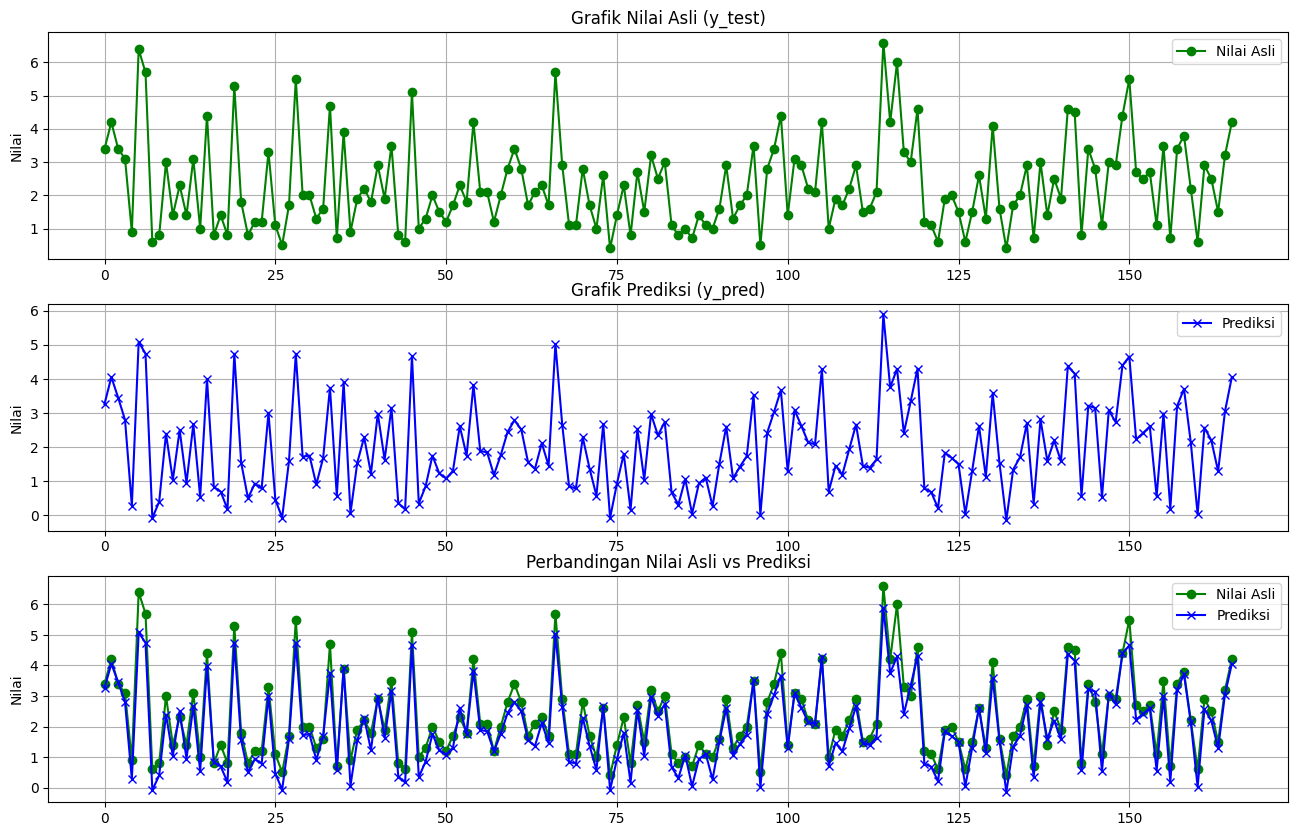

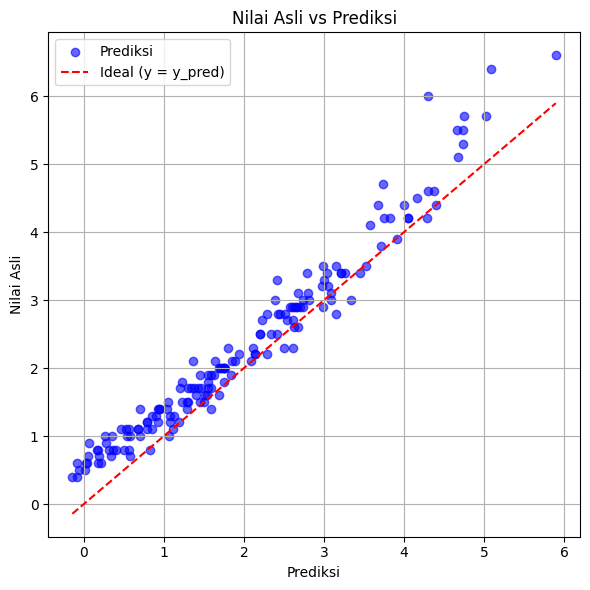

In [ ]:
plt.figure(figsize=(16,10))

# Step 30: Grafik Nilai Asli (y_test)
plt.subplot(3, 1, 1)
plt.plot(y_test_np, label='Nilai Asli', color='green', marker='o')
plt.title('Grafik Nilai Asli (y_test)')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()

# Step 31: Grafik Prediksi (y_pred)
plt.subplot(3, 1, 2)
plt.plot(y_pred, label='Prediksi', color='blue', marker='x')
plt.title('Grafik Prediksi (y_pred)')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()

# Step 32: Grafik Perbandingan Nilai Asli vs Prediksi
# Line Plot
plt.subplot(3, 1, 3)
plt.plot(y_test_np, label='Nilai Asli', color='green', marker='o')
plt.plot(y_pred, label='Prediksi', color='blue', marker='x')
plt.title('Perbandingan Nilai Asli vs Prediksi')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()

# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(y_pred, y_test_np, color='blue', alpha=0.6, label="Prediksi")
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()],
color='red', linestyle='--', label="Ideal (y = y_pred)")
plt.title("Nilai Asli vs Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Nilai Asli")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

EVALUASI MODEL

In [ ]:
# Step 33: MSE (Mean Squared Error)
mse_value = np.mean((y_test_np - y_pred) ** 2)

# Step 34: RMSE (Root Mean Squared Error)
rmse_value = np.sqrt(mse_value)

# Step 35: MAE (Mean Absolute Error)
mae_value = np.mean(np.abs(y_test_np - y_pred))

# Step 36: R² Score (Koefisien Determinasi)
ss_total = np.sum((y_test_np - np.mean(y_test_np)) ** 2)
ss_residual = np.sum((y_test_np - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

# Step 37: Tampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
print(f"MSE  : {mse_value:.4f}")
print(f"RMSE : {rmse_value:.4f}")
print(f"MAE  : {mae_value:.4f}")
print(f"R²   : {r2_score:.4f}")

Hasil Evaluasi Model:
MSE  : 0.1833
RMSE : 0.4282
MAE  : 0.3483
R²   : 0.8996


VISUALISASI HASIL EVALUASI MODEL

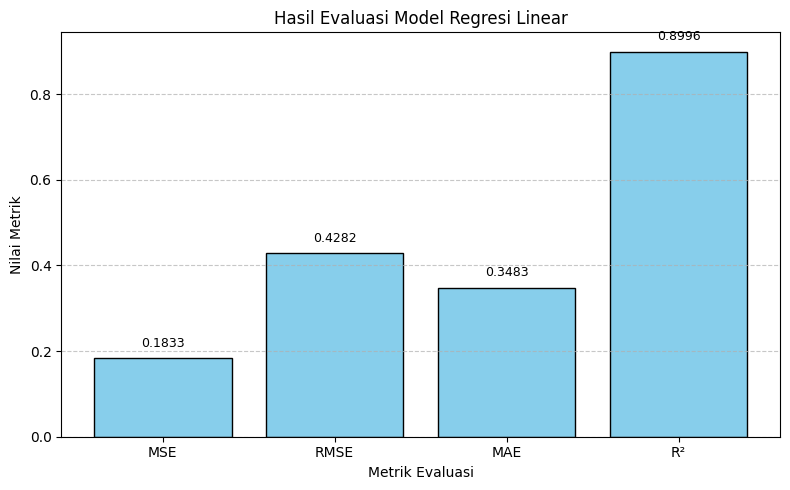

In [ ]:
# Step 38: Data evaluasi model
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse_value, rmse_value, mae_value, r2_score]

# Step 39: Membuat bar chart untuk hasil evaluasi model
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color='skyblue', edgecolor='black')

# Step 40: Menambahkan label nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=9)

# Step 41: Tambahkan judul dan label sumbu
plt.title('Hasil Evaluasi Model Regresi Linear')
plt.ylabel('Nilai Metrik')
plt.xlabel('Metrik Evaluasi')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

VALIDASI HASIL (K-FOLD CROSS VALIDATION)

In [ ]:
# Step 42: Gabungkan kembali fitur dan label
X_all = X.to_numpy()
y_all = np.concatenate([y_train, y_test])

# Step 43: Tentukan jumlah fold
k = 5
fold_size = len(X_all) // k

mse_scores = []

# Step 44: Proses K-Fold Cross Validation
for i in range(k):
    # Tentukan indeks untuk fold ke-i
    start = i * fold_size
    end = (i + 1) * fold_size if i < k - 1 else len(X_all)

    X_val = X_all[start:end]
    y_val = y_all[start:end]

    X_train_fold = np.concatenate((X_all[:start], X_all[end:]), axis=0)
    y_train_fold = np.concatenate((y_all[:start], y_all[end:]), axis=0)

    # Inisialisasi bobot dan bias baru
    weights = np.zeros(X_train_fold.shape[1])
    bias = 0.0

    # Standardisasi data
    mean = np.mean(X_train_fold, axis=0)
    std = np.std(X_train_fold, axis=0)
    X_train_fold = (X_train_fold - mean) / std
    X_val = (X_val - mean) / std

    # Training model
    learning_rate = 0.001
    epochs = 500  # cukup 500 agar tidak terlalu lama

    for epoch in range(epochs):
        y_pred_fold = np.dot(X_train_fold, weights) + bias
        error = y_train_fold - y_pred_fold
        weights -= learning_rate * (-2 * np.dot(X_train_fold.T, error) / len(X_train_fold))
        bias -= learning_rate * (-2 * np.sum(error) / len(X_train_fold))

    # Evaluasi model
    y_val_pred = np.dot(X_val, weights) + bias
    mse = np.mean((y_val - y_val_pred) ** 2)
    mse_scores.append(mse)
    print(f"Fold {i+1}, MSE: {mse:.4f}")

# Step 45: Hitung rata-rata MSE
mean_mse = np.mean(mse_scores)
print(f"\nRata-rata MSE dari {k}-Fold: {mean_mse:.4f}")

Fold 1, MSE: 0.8444
Fold 2, MSE: 0.8166
Fold 3, MSE: 0.8811
Fold 4, MSE: 0.8392
Fold 5, MSE: 0.8576

Rata-rata MSE dari 5-Fold: 0.8478


VISUALISASI HASIL K-FOLD CROSS VALIDATION

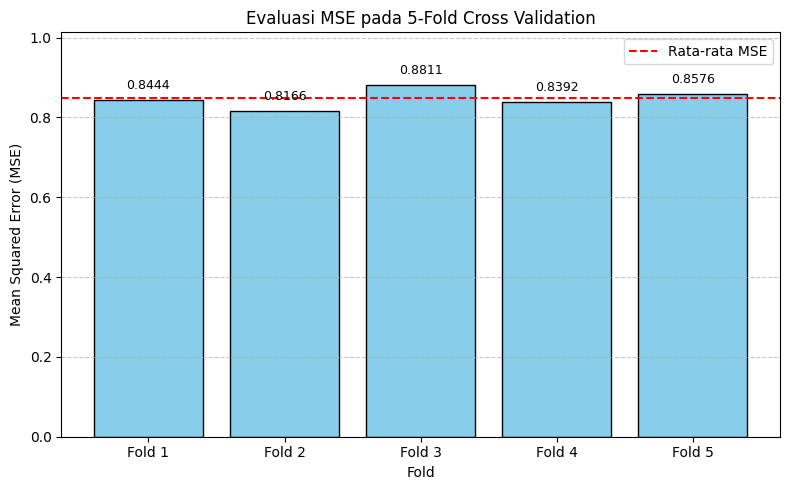

In [ ]:
# Step 46: Buat bar chart untuk MSE per fold
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
mse_values = mse_scores
plt.figure(figsize=(8, 5))
bars = plt.bar(folds, mse_values, color='skyblue', edgecolor='black')
plt.axhline(y=sum(mse_values)/len(mse_values), color='red', linestyle='--', label='Rata-rata MSE')
plt.ylim(0, max(mse_values) * 1.15)

# Step 47: Tambahkan label nilai di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=9)

# Step 48: Tampilkan hasil evaluasi
plt.title('Evaluasi MSE pada 5-Fold Cross Validation')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Fold')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()